In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras 

2024-05-16 17:45:08.143910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 17:45:08.144048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 17:45:08.303557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path="/kaggle/input/gtsrb-german-traffic-sign/Train"
data_list = [] 
labels_list = [] 
classes_list = 43 
for i in range(classes_list): 
    i_path = os.path.join(path, str(i)) 
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img) 
        im = im.resize((32,32)) 
        im = np.array(im) 
        data_list.append(im) 
        labels_list.append(i) 
data = np.array(data_list) 
labels = np.array(labels_list) 
data = data / 255.0

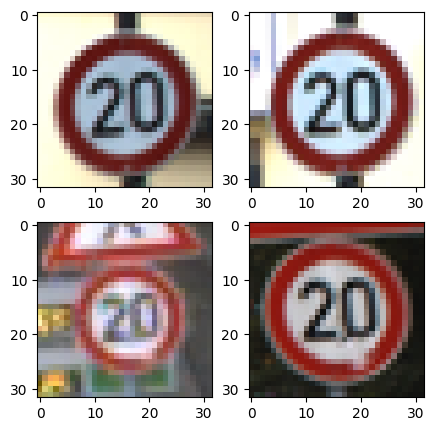

In [3]:
plt.figure(figsize = (5,5)) 

for i in range(4) : 
    plt.subplot(2, 2, i+1) 
    plt.imshow(data[i], cmap='gray')

plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [5]:
num_classes = classes_list
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[32, 32, 3]))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation="softmax"))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,411 (665.67 KB)

 Trainable params: 170,411 (665.67 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.3172 - loss: 2.4892 - val_accuracy: 0.8129 - val_loss: 0.6089
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8739 - loss: 0.4313 - val_accuracy: 0.9398 - val_loss: 0.2340
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9485 - loss: 0.1891 - val_accuracy: 0.9412 - val_loss: 0.2169
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9684 - loss: 0.1203 - val_accuracy: 0.9663 - val_loss: 0.1388
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9823 - loss: 0.0699 - val_accuracy: 0.9725 - val_loss: 0.1221
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9861 - loss: 0.0522 - val_accuracy: 0.9697 - val_loss: 0.1319
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.9882 - loss: 0.0461 - val_accuracy: 0.9791 - val_loss: 0.1030
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.9918 - loss: 0.0316 - 

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9838 - loss: 0.0798
Test accuracy: 0.9833375811576843


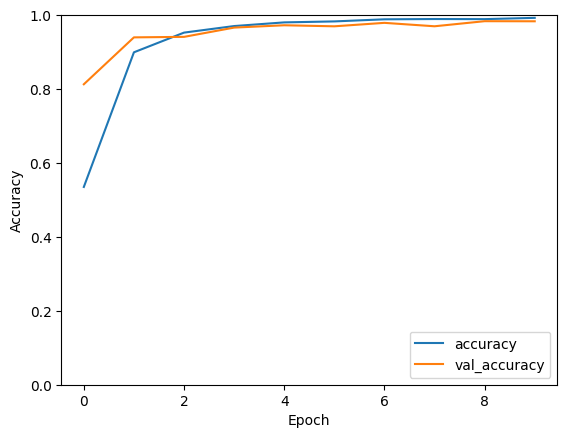

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_pred_classes, average=None)
recall = recall_score(y_true, y_pred_classes, average=None)
f1 = f1_score(y_true, y_pred_classes, average=None)

print("Precision for each class:")
print(precision)
print("Recall for each class:")
print(recall)
print("F1 Score for each class:")
print(f1)


368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Precision for each class:
[0.96153846 0.99850746 0.98821797 0.96190476 0.99185668 0.97822142
 0.99009901 0.96674584 0.94845361 0.99769585 0.9963964  0.99426934
 0.99391172 0.98325723 0.99176955 0.96315789 1.         1.
 0.98614958 0.98245614 0.92523364 0.88983051 0.96850394 0.98648649
 0.97468354 0.98426966 1.         0.92105263 0.93251534 0.98837209
 0.96453901 0.98765432 0.98305085 0.99056604 1.         0.9941691
 0.9921875  1.         0.99517685 1.         0.97196262 0.95890411
 1.        ]
Recall for each class:
[0.94339623 0.95028409 0.97813411 0.97349398 0.98225806 0.95907473
 0.99009901 0.99754902 0.99137931 0.99084668 0.99460432 0.98860399
 0.99847095 0.9984544  0.99586777 0.99456522 1.         0.996997
 0.99441341 0.8358209  0.99       1.         0.99193548 0.9068323
 0.93902439 0.98426966 0.98314607 0.95890411 0.97435897 0.95505618
 0.98550725 0.97959184 0.98305085 1.         0.9924812  0.99127907
 0.9921875  0.97260274 1.         0.98

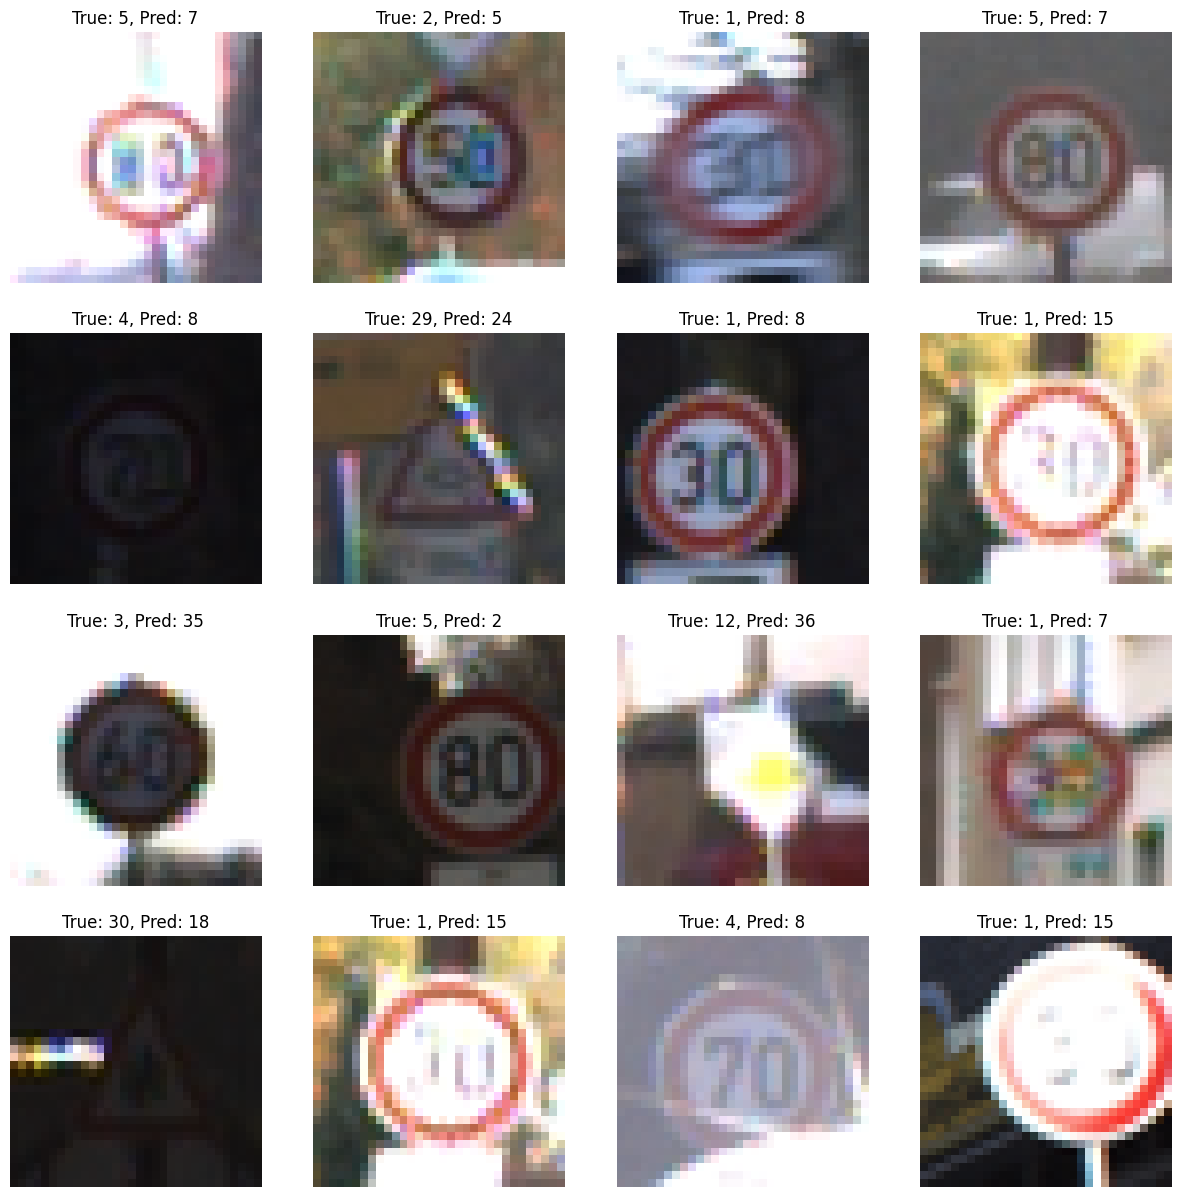

In [11]:
misclassified_indices = np.where(y_true != y_pred_classes)[0]

plt.figure(figsize=(15, 15))
for i, mis_idx in enumerate(misclassified_indices[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[mis_idx])
    plt.title(f"True: {y_true[mis_idx]}, Pred: {y_pred_classes[mis_idx]}")
    plt.axis('off')
plt.show()
